
## Downloading Data


In [1]:
 ! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abasiama","key":"84af77b8aed23a2564b66a788052a577"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
!kaggle datasets download -d pankeshpatel/hiring
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-06-01 11:18:46           7015  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4223  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1407  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           2161  
mathurinache/twitter-edge-nodes                             Twitter Edge Nod

# import libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler


In [26]:
df = pd.read_csv('/content/hiring.csv')

In [27]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [28]:
df.tail()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [29]:
df.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [30]:
df.shape

(8, 4)

In [31]:
df.experience.value_counts()

five      1
eleven    1
two       1
ten       1
seven     1
three     1
Name: experience, dtype: int64

In [32]:
nums = {"experience":{"two": 2,"three":3,"eleven":11,"seven":7,"ten":10,"five":5}}

In [33]:
df = df.replace(nums)

In [34]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000


In [35]:
df.dtypes

experience                    float64
test_score(out of 10)         float64
interview_score(out of 10)      int64
salary($)                       int64
dtype: object

In [36]:
df.describe()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
count,6.000000,7.000000,8.000000,8.00000
mean,6.333333,7.857143,7.875000,63000.00000
std,3.669696,1.345185,1.642081,11501.55269
min,2.000000,6.000000,6.000000,45000.00000
25%,3.500000,7.000000,6.750000,57500.00000
50%,6.000000,8.000000,7.500000,63500.00000
75%,9.250000,8.500000,9.250000,70500.00000
max,11.000000,10.000000,10.000000,80000.00000


In [37]:
df['experience'].fillna(0, inplace=True)
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].mean(), inplace=True)

In [38]:
df.isnull().sum()

experience                    0
test_score(out of 10)         0
interview_score(out of 10)    0
salary($)                     0
dtype: int64

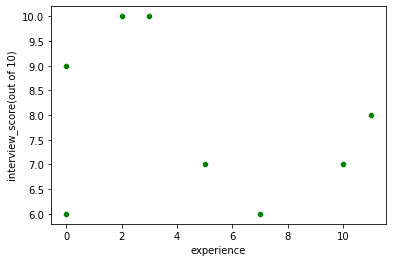

In [39]:
sns.scatterplot(x=df.experience,y=df['interview_score(out of 10)'],color='green')
plt.show()

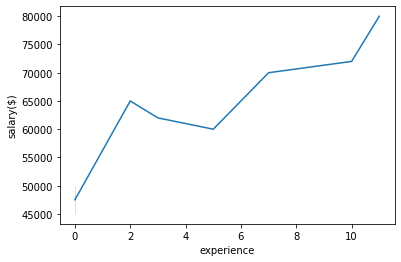

In [40]:
sns.lineplot(x=df.experience,y=df['salary($)'])
plt.show()

In [41]:
df.columns

Index(['experience', 'test_score(out of 10)', 'interview_score(out of 10)',
       'salary($)'],
      dtype='object')

In [42]:
x = df.drop('salary($)',axis=1)
y = df['salary($)']

In [43]:
scaler=StandardScaler()
scaler.fit(x)
x_sc = scaler.transform(x)

In [44]:
reg = linear_model.Lasso(alpha=0.1)
salary_model = reg.fit(x_sc,y)
pred = salary_model.predict(x_sc)

In [45]:
print("MAE is {}".format(mean_absolute_error(y,pred)))

MAE is 1739.823215001793


In [46]:
import pickle
# open a file, where you ant to store the data
file = open('salary_model.pkl', 'wb')

# dump information to that file
pickle.dump(salary_model,file)